In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
# 1000개의 입력단어를 한단어 64바이트 형태로 출력
model.add(layers.Embedding(input_dim=1000, output_dim=64))
# Long short Term memory 출력지수 128
model.add(layers.LSTM(128))
# 가중치를 이용해서 10개의 출력
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
# LSTM셀의 회로를 단순화 시킨 셀
# 리턴값 : batch_szie, timeseries(셀 수), 256과 같이 출력
model.add(layers.GRU(256, return_sequences=True))
# batch_size, 128(마지막 state_h만 사용)
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         247296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


In [5]:
import os
np.random.seed(42)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layer=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout :
        plt.tight_layout()
    plt.savefig(path, format=fig_extensio, dpi=resolution)

In [8]:
# 시계열 데이터 생성 함수
def gernerate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    # 차수를 확장하는 이유 : RNN의 입력데이터 형태
    # [batch_size, timeserise, 입력]
    # 배치, 셀수(rnn), 셀당 입력, 10000x50 => 10000x50x1
    return series[..., np.newaxis].astype(np.float32)

In [9]:
np.random.seed(42)
n_steps = 50
series = gernerate_time_series(10000, n_steps + 1) # 처음 데이터 고려
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, n_steps], series[9000:, -1]

In [10]:
X_train.shape, y_train.shape # 50개의 연속시계열 데이터와 에측값
# 셀수
# 배치사이즈, 셀수, 셀당 입력사이즈

((7000, 50, 1), (7000, 1))

In [11]:
# 시계열 데이터 생성 함수
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1]) 

In [12]:
# FFNN으로 구현
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)]) # 50x1 행렬로 계산

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0774 - val_loss: 0.0410
Epoch 2/20
219/219 [==============================] - 0s 911us/step - loss: 0.0274 - val_loss: 0.0199
Epoch 3/20
219/219 [==============================] - 0s 910us/step - loss: 0.0159 - val_loss: 0.0137
Epoch 4/20
219/219 [==============================] - 0s 929us/step - loss: 0.0119 - val_loss: 0.0111
Epoch 5/20
219/219 [==============================] - 0s 910us/step - loss: 0.0098 - val_loss: 0.0095
Epoch 6/20
219/219 [==============================] - 0s 954us/step - loss: 0.0084 - val_loss: 0.0081
Epoch 7/20
219/219 [==============================] - 0s 852us/step - loss: 0.0073 - val_loss: 0.0072
Epoch 8/20
219/219 [==============================] - 0s 895us/step - loss: 0.0064 - val_loss: 0.0063
Epoch 9/20
219/219 [==============================] - 0s 895us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 10/20
219/219 [==============================] - 0s 864us/step - loss: 0.0053 

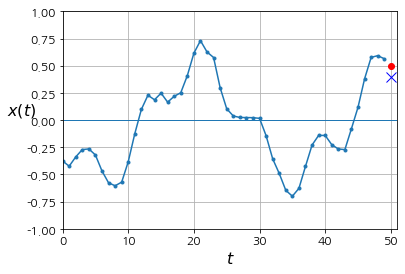

In [13]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [14]:
# RNN으로 구현
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    # flatten 없이 출력 1개
    # 50개의 데이터가 50개의 cell을 생성
    # 마지막 1개의 값만 출력
    # 50개가 만들어짐 => rnn - rnn - rnn ----------------- rnn
    keras.layers.SimpleRNN(1, input_shape=[None, 1])])
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0967 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0369 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0253 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0116 - val_loss: 0.0110

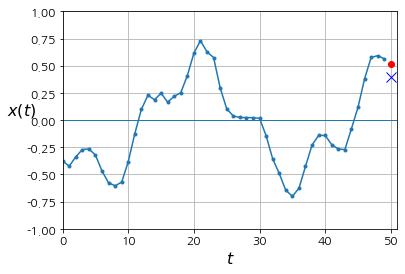

In [15]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [16]:
# Deep RNN으로 구현
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True,
                           input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)]) # keras.layers.Dense(1)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0338 - val_loss: 0.0047
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 8/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 9/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 10/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0038 - val_lo

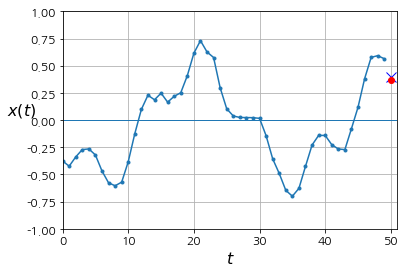

In [17]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

### 긍부정 분류 - 영화평

In [18]:
print(tf.__version__)
imdb = keras.datasets.imdb #숫자로 이루어진 텍스트
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("훈련 샘플 : {}, 레이블 : {}".format(len(train_data), len(train_labels)))
# 사전 table 
print(train_data[0])
len(train_data[0]), len(train_data[1]) # 218 189
word_index = imdb.get_word_index()

2.2.0
17465344/17464789 [==============================] - 0s 0us/step


C:\Users\020\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\020\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


훈련 샘플 : 25000, 레이블 : 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1646592/1641221 [================

In [20]:
#키[단어]와 value(index) : 키입력 =>
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0 # 공백
word_index["<START>"] = 1
word_index["<UNK>"] = 2 #
word_index["<UNUSED>"] = 3

In [21]:
# 번호 -> 키
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return  ' '.join([reverse_word_index.get(i, '?') for i in text])
decode_review(train_data[0])
#padding 사이즈가 일치하도록 패딩
# 256자로 사이즈 일치
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

In [27]:
len(train_data[0]), len(train_data[1])
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [23]:
vocab_size = 10000 # 중요단어 1000개만 가지고 학습
model = keras.Sequential()
# vectorizing : 근접단어는 가깝게 단어와 단어 행렬을 생성하고
# 차원축소해서 표현합니다.
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))

# 셀은 LSTM셀을 사용하고
model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(16)))
# 특징 추출후 - > FFNN
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [24]:
model.summary()
model.compile(optimizer='adam', # learning-rate, momemtum을 그로ㅕ
             loss = 'binary_crossentropy', # 확률값 -> cost
             metrics=['accuracy'])
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=1)
result = model.evaluate(test_data, test_labels, verbose=2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 164,769
Trainable params: 164,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
30/30 [==============================] - 18s 589ms/step - loss: 0.6924 - accuracy: 0.5271 - val_loss: 0.6906 - val_accuracy: 0.5538
Epoch 2/40
30/30 [==============================] - 17s 581ms/step - loss: 0.6521 - accuracy: 0.6635 - 

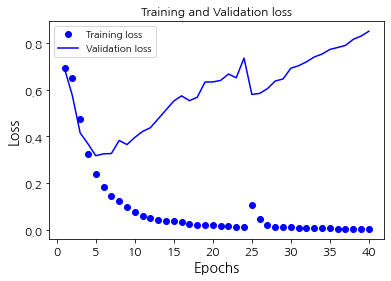

In [26]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# mnist 를
# 위치적 순서성

In [29]:
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation # FFNN
from tensorflow.keras.layers import SimpleRNN # 마지막 output만 사용
from tensorflow.keras import initializers # 가중치 random
from tensorflow.keras.optimizers import RMSprop # text분석에 적합
batch_size = 32
num_classes = 10
epochs = 200
hidden_units = 100 # output 100
learning_rate = 1e-6 # 0.000001
clip_norm = 1.0

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1, 1) # 784, 1
x_test = x_test.reshape(x_test.shape[0], -1, 1)
x_train = x_train.astype('float32')# 정규화하기 위해서 타입 변경
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("차원", x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

차원 (60000, 784, 1)
60000 train samples
10000 test samples


In [33]:
model = Sequential()
# 32 x 784 x 100
# 가중치 : ceil 1개가 == FFNN 양과 같다 + 다음셀로 연결회로를 가진
model.add(SimpleRNN(hidden_units, # output 차수   100
                    # 가중치 kernel
                   kernel_initializer=initializers.RandomNormal(stddev=0.001),
                   recurrent_initializer=initializers.identity(gain=1.0),
                   activation='relu',
                   input_shape=x_train.shape[1:])) # 784, 1

In [35]:
model.add(Dense(num_classes))
model.add(Activation('softmax'))
rmsprop = RMSprop(lr=learning_rate)
model.compile(loss='categorical_crossentropy',
             optimizer=rmsprop,
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
         batch_size=batch_size, #60000 / 32
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=0)
print('test score', scores[0])
print('test accuracy', scores[1])

Epoch 1/200
1875/1875 [==============================] - 177s 95ms/step - loss: 2.2796 - accuracy: 0.1534 - val_loss: 2.2475 - val_accuracy: 0.2420
Epoch 2/200
1875/1875 [==============================] - 171s 91ms/step - loss: 2.2223 - accuracy: 0.2423 - val_loss: 2.2102 - val_accuracy: 0.2463
Epoch 3/200
1875/1875 [==============================] - 170s 91ms/step - loss: 2.1997 - accuracy: 0.2661 - val_loss: 2.1956 - val_accuracy: 0.2582
Epoch 4/200
1875/1875 [==============================] - 171s 91ms/step - loss: 2.1915 - accuracy: 0.2820 - val_loss: 2.1994 - val_accuracy: 0.2823
Epoch 5/200
1875/1875 [==============================] - 171s 91ms/step - loss: 2.1869 - accuracy: 0.2901 - val_loss: 2.1873 - val_accuracy: 0.2745
Epoch 6/200
1875/1875 [==============================] - 171s 91ms/step - loss: 2.1832 - accuracy: 0.2922 - val_loss: 2.1784 - val_accuracy: 0.2967
Epoch 7/200
1875/1875 [==============================] - 173s 92ms/step - loss: 2.1791 - accuracy: 0.2978 - val_

In [13]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
numpy.random.seed(1)

In [9]:
dataframe = pandas.read_csv('AirPassengers.csv', usecols=[1],
                              engine='python', skipfooter=3)

dataset = dataframe.values
dataset = dataset.astype('float32')

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :],dataset[train_size:len(dataset), :]
print(len(train), len(test))

94 47


In [10]:
# 시계열 데이터 (예측) : window = 3기
# 1,2,3,4,5,6,7,8,9,10,11,12,1,2,3
# 1,2,3 4월 예측
# 2,3,4 5월 예측
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1): # 0부터 시작
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [11]:
look_back =2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(8, input_dim=look_back, activation = 'relu')) # 2x8
model.add(Dense(1)) # 8x1
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
46/46 - 0s - loss: 43810.7656
Epoch 2/200
46/46 - 0s - loss: 27059.1016
Epoch 3/200
46/46 - 0s - loss: 14547.6611
Epoch 4/200
46/46 - 0s - loss: 6843.3613
Epoch 5/200
46/46 - 0s - loss: 2803.2708
Epoch 6/200
46/46 - 0s - loss: 1208.1764
Epoch 7/200
46/46 - 0s - loss: 708.5649
Epoch 8/200
46/46 - 0s - loss: 597.6292
Epoch 9/200
46/46 - 0s - loss: 577.3676
Epoch 10/200
46/46 - 0s - loss: 569.8655
Epoch 11/200
46/46 - 0s - loss: 574.0879
Epoch 12/200
46/46 - 0s - loss: 567.6693
Epoch 13/200
46/46 - 0s - loss: 568.0264
Epoch 14/200
46/46 - 0s - loss: 564.6354
Epoch 15/200
46/46 - 0s - loss: 565.3190
Epoch 16/200
46/46 - 0s - loss: 569.2900
Epoch 17/200
46/46 - 0s - loss: 568.7130
Epoch 18/200
46/46 - 0s - loss: 567.8204
Epoch 19/200
46/46 - 0s - loss: 564.6151
Epoch 20/200
46/46 - 0s - loss: 568.6857
Epoch 21/200
46/46 - 0s - loss: 572.0266
Epoch 22/200
46/46 - 0s - loss: 559.6877
Epoch 23/200
46/46 - 0s - loss: 566.2989
Epoch 24/200
46/46 - 0s - loss: 558.6109
Epoch 25/200
46/

Epoch 199/200
46/46 - 0s - loss: 497.0361
Epoch 200/200
46/46 - 0s - loss: 504.2893


In [17]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan

trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

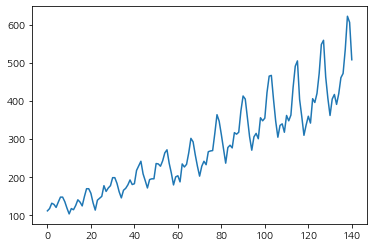

In [18]:
%matplotlib inline
plt.plot(dataset)
plt.show()

In [ ]:
# 전기 사용량 예측

In [11]:
import os
import re
DATA_DIR = "./data"
fid = open(os.path.join(DATA_DIR, 'elec2011_2014.txt'), 'rb')
data = []
line_num = 0
cid =250
for line in fid:
    if line.startswith(b"\"\";"):
            continue
    if line_num % 100 == 0:
        print("{:d} lines read".format(line_num))
    cols = [float(re.sub(b",",b".",x))for x in line.strip().split(b";")[1:]]
    # 데이터가 ;으로 분리되어있음
    data.append(cols[cid])
    line_num += 1
fid.close()

0 lines read
100 lines read
200 lines read
300 lines read
400 lines read
500 lines read
600 lines read
700 lines read
800 lines read
900 lines read
1000 lines read
1100 lines read
1200 lines read
1300 lines read
1400 lines read
1500 lines read
1600 lines read
1700 lines read
1800 lines read
1900 lines read
2000 lines read
2100 lines read
2200 lines read
2300 lines read
2400 lines read
2500 lines read
2600 lines read
2700 lines read
2800 lines read
2900 lines read
3000 lines read
3100 lines read
3200 lines read
3300 lines read
3400 lines read
3500 lines read
3600 lines read
3700 lines read
3800 lines read
3900 lines read
4000 lines read
4100 lines read
4200 lines read
4300 lines read
4400 lines read
4500 lines read
4600 lines read
4700 lines read
4800 lines read
4900 lines read
5000 lines read
5100 lines read
5200 lines read
5300 lines read
5400 lines read
5500 lines read
5600 lines read
5700 lines read
5800 lines read
5900 lines read
6000 lines read
6100 lines read
6200 lines read
6300

49200 lines read
49300 lines read
49400 lines read
49500 lines read
49600 lines read
49700 lines read
49800 lines read
49900 lines read
50000 lines read
50100 lines read
50200 lines read
50300 lines read
50400 lines read
50500 lines read
50600 lines read
50700 lines read
50800 lines read
50900 lines read
51000 lines read
51100 lines read
51200 lines read
51300 lines read
51400 lines read
51500 lines read
51600 lines read
51700 lines read
51800 lines read
51900 lines read
52000 lines read
52100 lines read
52200 lines read
52300 lines read
52400 lines read
52500 lines read
52600 lines read
52700 lines read
52800 lines read
52900 lines read
53000 lines read
53100 lines read
53200 lines read
53300 lines read
53400 lines read
53500 lines read
53600 lines read
53700 lines read
53800 lines read
53900 lines read
54000 lines read
54100 lines read
54200 lines read
54300 lines read
54400 lines read
54500 lines read
54600 lines read
54700 lines read
54800 lines read
54900 lines read
55000 lines re

97600 lines read
97700 lines read
97800 lines read
97900 lines read
98000 lines read
98100 lines read
98200 lines read
98300 lines read
98400 lines read
98500 lines read
98600 lines read
98700 lines read
98800 lines read
98900 lines read
99000 lines read
99100 lines read
99200 lines read
99300 lines read
99400 lines read
99500 lines read
99600 lines read
99700 lines read
99800 lines read
99900 lines read
100000 lines read
100100 lines read
100200 lines read
100300 lines read
100400 lines read
100500 lines read
100600 lines read
100700 lines read
100800 lines read
100900 lines read
101000 lines read
101100 lines read
101200 lines read
101300 lines read
101400 lines read
101500 lines read
101600 lines read
101700 lines read
101800 lines read
101900 lines read
102000 lines read
102100 lines read
102200 lines read
102300 lines read
102400 lines read
102500 lines read
102600 lines read
102700 lines read
102800 lines read
102900 lines read
103000 lines read
103100 lines read
103200 lines rea

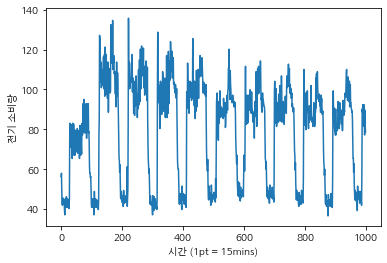

In [14]:
NUM_ENTRIES = 1000
plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES]) # 낮인지 밤인지
plt.ylabel("전기 소비량")
plt.xlabel("시간 (1pt = 15mins)")
plt.show()
# numpy 포멧으로 저장
numpy.save(os.path.join(DATA_DIR, "LD_250.npy"), numpy.array(data))

In [ ]:
# 데이터를 로딩하고 minmaxscaler를 이용해서 스케일링 하시오

In [15]:
from sklearn.preprocessing import MinMaxScaler
DATA_DIR = "./data"
data = numpy.load(os.path.join(DATA_DIR, "LD_250.npy"))
data = data.reshape(-1,1) #열데이터로 변경
scaler = MinMaxScaler(feature_range=(0,1), copy=False)
data = scaler.fit_transform(data)

In [ ]:
# 상태 보전형 순환 신경망

In [24]:
STATELESS = True
NUM_TIMESTEPS = 20
HIDDEN_SIZE = 10
BATCH_SIZE = 96
NUM_EPOCHS = 5

In [28]:
import numpy as np
X = np.zeros((data.shape[0], NUM_TIMESTEPS))
Y = np.zeros((data.shape[0], 1))

for i in range(len(data) - NUM_TIMESTEPS - 1):
    X[i] = data[i:i + NUM_TIMESTEPS].T
    Y[i] = data[i + NUM_TIMESTEPS + 1]
    
X = np.expand_dims(X, axis=2)
sp = int(0.7 * len(data))
Xtrain, Xtest, Ytrain, Ytest = X[0:sp], X[sp:], Y[0:sp], Y[sp:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(98179, 20, 1) (42077, 20, 1) (98179, 1) (42077, 1)


In [29]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
if STATELESS:
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1),
                   return_sequences=False))
    model.add(Dense(1))
    
else: # stateful
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, stateful=True, batch_input_shape=(BATCH_SIZE, NUM_TIMESTEPS, 1),
                   return_sequences=False))
    model.add(Dense(1))
    
model.compile(loss="mean_squared_error", optimizer="adam",
              metrics=["mean_squared_error"])

In [30]:
if STATELESS:
    model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(Xtest, Ytest),
              shuffle=False)
else:
    train_size = (Xtrain.shape[0] // BATCH_SIZE) * BATCH_SIZE
    test_size = (Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
    
    Xtrain, Ytrain = Xtrain[0:train_size], Ytrain[0:train_size]
    Xtest, Ytest = Xtest[0:test_size], Ytest[0:test_size]
    
    print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
    
    for i in range(NUM_EPOCHS): # 1회전 epoch마다 state를 리셀
        print("Epoch {:d}/{:d}".format(i+1, NUM_EPOCHS))
        
        model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=1,
                  validation_data=(Xtest, Ytest),
                  shuffle=False)
        model.reset_states() # 마지막 state값을 다음 학습 초기치로 입력

Epoch 1/5
1023/1023 [==============================] - 7s 7ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 2/5
1023/1023 [==============================] - 6s 6ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/5
1023/1023 [==============================] - 6s 6ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 4/5
1023/1023 [==============================] - 6s 6ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5/5
1023/1023 [==============================] - 6s 6ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


In [31]:
score, _= model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))

439/439 [==============================] - 1s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037

MSE: 0.004, RMSE: 0.061


In [32]:
# 뉴스 카테고리 구분

In [37]:
import numpy
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [38]:
seed = 0
numpy.random.seed(seed)

In [39]:
tf.random.set_seed(3)
(X_train, Y_train), (X_test, Y_test) =  reuters.load_data(num_words=1000, test_split=0.2)
category = numpy.max(Y_train)+1
print(category, "카테고리")
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2113536/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


C:\Users\020\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\020\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [48]:
from tensorflow.keras.models import Sequential
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Epoch 1/20
90/90 [==============================] - 10s 112ms/step - loss: 2.5960 - accuracy: 0.3467 - val_loss: 2.3613 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 9s 105ms/step - loss: 2.1255 - accuracy: 0.4628 - val_loss: 2.0022 - val_accuracy: 0.5067
Epoch 3/20
90/90 [==============================] - 9s 95ms/step - loss: 1.9119 - accuracy: 0.5055 - val_loss: 1.8394 - val_accuracy: 0.5374
Epoch 4/20
90/90 [==============================] - 8s 91ms/step - loss: 1.7475 - accuracy: 0.5471 - val_loss: 1.7131 - val_accuracy: 0.5628
Epoch 5/20
90/90 [==============================] - 8s 93ms/step - loss: 1.6578 - accuracy: 0.5803 - val_loss: 1.6835 - val_accuracy: 0.5668
Epoch 6/20
90/90 [==============================] - 9s 99ms/step - loss: 1.6096 - accuracy: 0.5990 - val_loss: 1.7018 - val_accuracy: 0.5890
Epoch 7/20
90/90 [==============================] - 8s 91ms/step - loss: 1.5033 - accuracy: 0.6236 - val_loss: 1.5150 - val_accuracy: 0.6233
Epoch 8/20

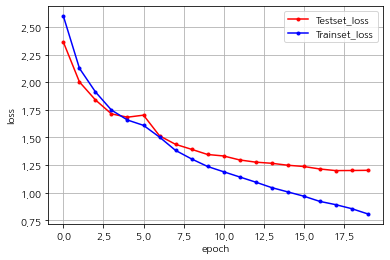

In [49]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                    validation_data=(x_test, y_test))
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 문제
- 첫번째 기사의 원문을 출력하시오
- LSTM에서 사용하는 activation에 대하여 parameter tuning을 실시하시오(relu, sigmoid, tanh)

In [54]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

557056/550378 [==============================] - 0s 0us/step


In [57]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
X_train[0]])

In [58]:
decoded_newswire

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

In [60]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [70]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
def b_fn(lr = 0.01):
    model = Sequential()
    model.add(Embedding(1000,100))
    model.add(LSTM(100, activation='tanh'))
    model.add(Dense(46, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

clf=GridSearchCV(KerasClassifier(build_fn=b_fn, epochs=20, batch_size=100),
                          {'activation' : ['relu', 'sigmoid', 'tanh'], 'validation_data' : [(x_test, y_test)],
                           'callbacks' : [[early_stopping_callback]]})

clf.fit(x_train, y_train)

ValueError: activation is not a legal parameter

In [66]:
a={'activation' : ['relu', 'sigmoid', 'tanh'], 'validation_data' : [(x_test, y_test)],
                           'callbacks' : [[early_stopping_callback]]}
a

{'activation': ['relu', 'sigmoid', 'tanh'],
 'validation_data': [(array([[  5,   2,   7, ..., 510,  17,  12],
          [652, 194,   2, ..., 760,  17,  12],
          [ 13,  10, 139, ...,   8,  17,  12],
          ...,
          [  0,   0,   0, ...,  11,  17,  12],
          [  0,   0,   0, ...,   8,  17,  12],
          [ 47, 758,  15, ...,   2,  17,  12]]),
   array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 1., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))],
 'callbacks': [[<tensorflow.python.keras.callbacks.EarlyStopping at 0x1a53a016e50>]]}